<a href="https://colab.research.google.com/github/vinits7/ML-Projects/blob/main/TimelineAnalysis_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author- Vinit Shah

Create a storyboard showing spread of Covid-19 cases in your country or any
region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

● Analyze Data showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc)

● Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

Import Required Libraries

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv('/content/owid-covid-data.csv')

In [25]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [26]:
df = df.drop(columns = ["total_cases", "total_deaths", "total_tests", "icu_patients", "hosp_patients", "reproduction_rate", "cardiovasc_death_rate", "human_development_index"])
df.head()

,iso_code,continent,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,0.122,0.122,...,NaN,NaN,37.746,0.5,64.83,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,0.122,0.000,...,NaN,NaN,37.746,0.5,64.83,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,0.122,0.000,...,NaN,NaN,37.746,0.5,64.83,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,0.122,0.000,...,NaN,NaN,37.746,0.5,64.83,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,0.122,0.000,...,NaN,NaN,37.746,0.5,64.83,41128772.0,NaN,NaN,NaN,NaN


In [27]:
df = df[df["location"] != "World"]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260362 entries, 0 to 261498
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    260362 non-null  object 
 1   continent                                   246824 non-null  object 
 2   location                                    260362 non-null  object 
 3   date                                        260362 non-null  object 
 4   new_cases                                   245538 non-null  float64
 5   new_cases_smoothed                          244339 non-null  float64
 6   new_deaths                                  226021 non-null  float64
 7   new_deaths_smoothed                         224840 non-null  float64
 8   total_cases_per_million                     244693 non-null  float64
 9   new_cases_per_million                       244417 non-null  float64
 

In [30]:
df.isnull().sum()

iso_code                                           0
continent                                      13538
location                                           0
date                                               0
new_cases                                      14824
new_cases_smoothed                             16023
new_deaths                                     34341
new_deaths_smoothed                            35522
total_cases_per_million                        15669
new_cases_per_million                          15945
new_cases_smoothed_per_million                 17139
total_deaths_per_million                       35377
new_deaths_per_million                         35449
new_deaths_smoothed_per_million                36625
icu_patients_per_million                      227064
hosp_patients_per_million                     224210
weekly_icu_admissions                         251605
weekly_icu_admissions_per_million             251605
weekly_hosp_admissions                        

In [31]:
df.describe()

,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.455380e+05,2.443390e+05,226021.000000,224840.000000,244693.000000,244417.000000,243223.000000,224985.00000,224913.000000,223737.000000,...,158294.000000,156113.000000,102548.000000,186279.000000,238910.000000,2.592410e+05,8.807000e+03,8807.000000,8807.000000,8807.000000
mean,8.989289e+03,9.023943e+03,96.158866,96.571013,75166.321186,176.584173,177.175843,760.96363,1.260571,1.259406,...,10.720258,32.808698,50.787282,3.091343,73.600413,1.061485e+08,5.315074e+04,10.310701,13.967308,1524.602805
std,5.915257e+04,5.702494e+04,516.813448,460.513814,126083.268260,1123.485152,665.150869,1036.65657,4.907424,3.160151,...,10.677366,13.587967,32.043392,2.558891,7.463941,4.582645e+08,1.444128e+05,13.129721,25.736074,1856.357022
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281600
25%,0.000000e+00,4.143000e+00,0.000000,0.000000,1401.553000,0.000000,0.862000,34.72500,0.000000,0.000000,...,1.900000,21.600000,19.351000,1.300000,69.500000,8.367830e+05,9.625000e+01,1.080000,0.110000,57.300138
50%,3.400000e+01,7.385700e+01,0.000000,1.000000,14206.788000,4.398000,15.401000,252.30700,0.000000,0.149000,...,6.300000,31.400000,49.542000,2.400000,75.050000,6.871547e+06,7.425699e+03,8.030000,7.540000,953.884640
75%,7.740000e+02,9.508570e+02,11.000000,12.714000,89772.091000,82.212000,121.628000,1159.21000,0.754000,1.116000,...,19.300000,41.300000,83.241000,4.200000,79.070000,3.347587e+07,3.845240e+04,16.240000,19.065000,2453.471550
max,2.852801e+06,2.347712e+06,60536.000000,10938.143000,726205.264000,228872.025000,36421.827000,6446.04000,554.204000,148.641000,...,44.000000,78.100000,100.000000,13.800000,86.750000,4.721383e+09,1.273323e+06,76.550000,376.770000,10251.770000


Continents by Cases & Deaths

In [32]:
continents = df.groupby("continent")["new_cases", "new_deaths"].agg(["sum"]).reset_index()
continents.columns = ["Continent", "Cases", "Deaths"]
continents["Cases %"] = (continents["Cases"] / sum(continents["Cases"])) * 100
continents["Deaths %"] = (continents["Deaths"] / sum(continents["Deaths"])) * 100
continents.sort_values(by = "Deaths", ascending = False)

,Continent,Cases,Deaths,Cases %,Deaths %
2,Europe,247936650.0,2035278.0,36.774422,29.759594
1,Asia,209318597.0,1615176.0,31.046521,23.616913
3,North America,122538104.0,1580096.0,18.175078,23.103977
5,South America,67862098.0,1326223.0,10.065432,19.391876
0,Africa,12507544.0,257773.0,1.855142,3.769126
4,Oceania,14046512.0,24519.0,2.083405,0.358514


Maximum Cases in Continents by Dates

In [33]:
mcd = df.groupby(["date", "continent", "new_cases"])["new_cases"].agg(["max"])
mcd = mcd.sort_values(by = "max", ascending = False).reset_index()
mcd

,date,continent,new_cases,max
0,2022-01-10,North America,1354502.0,1354502.0
1,2022-01-18,North America,1132845.0,1132845.0
2,2022-01-03,North America,1042791.0,1042791.0
3,2022-01-19,North America,909842.0,909842.0
4,2022-01-24,North America,908747.0,908747.0
...,...,...,...,...
148566,2020-12-17,Europe,0.0,0.0
148567,2022-09-04,Asia,0.0,0.0
148568,2020-12-17,Asia,0.0,0.0
148569,2020-12-17,Africa,0.0,0.0


Maximum Life Expectancy by Continent

In [34]:
cont_life_m = df.groupby("continent")["life_expectancy"].agg(["max"]).reset_index()
cont_life_m.columns = ["Continent", "Max"]
cont_life_m.sort_values(by = "Max", ascending = False)

,Continent,Max
2,Europe,86.75
1,Asia,84.86
3,North America,83.92
4,Oceania,83.44
5,South America,81.44
0,Africa,80.56


Minimum Life Expectancy by Continent

In [35]:
cont_life_n = df.groupby("continent")["life_expectancy"].agg(["min"]).reset_index()
cont_life_n.columns = ["Continent", "Min"]
cont_life_n.sort_values(by = "Min", ascending = True)

,Continent,Min
0,Africa,53.28
4,Oceania,59.96
3,North America,64.00
1,Asia,64.83
5,South America,69.91
2,Europe,71.90


Minumium and Maximum Life Expectancy by Continent

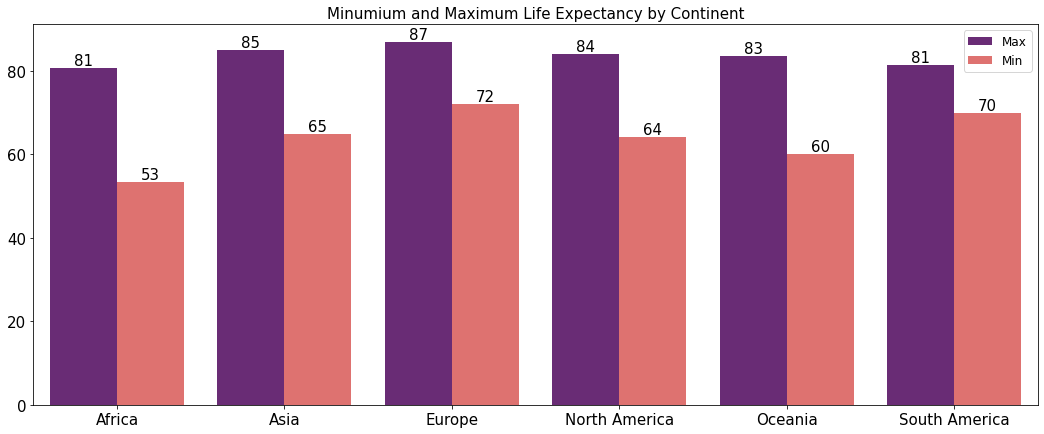

In [36]:
min_max_life = pd.merge(cont_life_m, cont_life_n, on = "Continent")
min_max_life = min_max_life.melt("Continent", var_name = "Life Expectancy", value_name = "Age")
min_max_life
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Continent", y = "Age", hue = "Life Expectancy", data = min_max_life, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Minumium and Maximum Life Expectancy by Continent", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(loc = 1, prop={'size': 12})
plt.show()

Top 10 Locations with Cases and Deaths

In [37]:
countries_cases_m = df.groupby(["location"])["new_cases", "new_deaths"].agg(["sum"]).reset_index()
countries_cases_m.columns = ["Countries", "Cases", "Deaths"]
countries_cases_m = countries_cases_m.sort_values(by = "Deaths", ascending = False)
countries_cases_m_head = countries_cases_m.head(10)
countries_cases_m_head["Cases %"] = (countries_cases_m_head["Cases"] / sum(countries_cases_m_head["Cases"])) * 100
countries_cases_m_head["Deaths %"] = (countries_cases_m_head["Deaths"] / sum(countries_cases_m_head["Deaths"])) * 100
countries_cases_m_head

,Countries,Cases,Deaths,Cases %,Deaths %
93,High income,431186185.0,2863339.0,26.215412,17.473799
234,Upper middle income,144096781.0,2588173.0,8.760848,15.794572
69,Europe,247936650.0,2035278.0,15.074141,12.420478
11,Asia,209318597.0,1615176.0,12.726227,9.856765
158,North America,122538104.0,1580096.0,7.450115,9.642686
126,Lower middle income,96603518.0,1339318.0,5.873335,8.173316
204,South America,67862098.0,1326223.0,4.125904,8.093402
70,European Union,184618404.0,1216789.0,11.224496,7.425571
232,United States,103643741.0,1122677.0,6.301369,6.851243
29,Brazil,36977190.0,699402.0,2.248152,4.268167


Top 10 Locations with low Cases

In [38]:
countries_cases_l = df.groupby("location")["new_cases", "new_deaths"].agg(["sum"]).reset_index()
countries_cases_l.columns = ["Countries", "Cases", "Deaths"]
countries_cases_l.sort_values(by = "Cases", ascending = True).head(10)

,Countries,Cases,Deaths
162,Northern Ireland,0.0,0.0
198,Sint Maarten (Dutch part),0.0,0.0
63,England,0.0,0.0
178,Puerto Rico,0.0,0.0
175,Pitcairn,0.0,0.0
86,Guam,0.0,0.0
88,Guernsey,0.0,0.0
163,Northern Mariana Islands,0.0,0.0
220,Tokelau,0.0,0.0
161,Northern Cyprus,0.0,0.0


Highest Number of deaths and cases by Dates

In [39]:
dates = df.groupby("date")["new_cases", "new_deaths"].agg(["sum"]).reset_index()
dates.columns = ["Date", "Cases", "Deaths"]
dates.sort_values(by = "Deaths", ascending = False).head()

,Date,Cases,Deaths
1110,2023-01-15,592573.0,182719.0
385,2021-01-20,2225759.0,57763.0
391,2021-01-26,1814048.0,56796.0
386,2021-01-21,2170666.0,55843.0
401,2021-02-05,1760965.0,55821.0



Top 10 Life Expectency by Countries

In [40]:
life_cont = df.groupby("location")["life_expectancy", "new_cases", "new_deaths"].agg(["max"]).reset_index()
life_cont.columns = ["Country", "Life Expectancy", "Cases", "Deaths"]
life_cont_head = life_cont.sort_values(by = "Life Expectancy", ascending = False).head(10)
life_cont_head

,Country,Life Expectancy,Cases,Deaths
141,Monaco,86.75,520.0,3.0
189,San Marino,84.97,491.0,6.0
95,Hong Kong,84.86,76991.0,294.0
108,Japan,84.63,260999.0,503.0
128,Macao,84.24,342.0,23.0
39,Cayman Islands,83.92,2146.0,4.0
212,Switzerland,83.78,89462.0,131.0
4,Andorra,83.73,2313.0,7.0
197,Singapore,83.62,39252.0,22.0
207,Spain,83.56,372766.0,1623.0


Low 10 Life Expectency by Countries

In [41]:
life_cont = df.groupby("location")["life_expectancy", "new_cases", "new_deaths"].agg(["max"]).reset_index()
life_cont.columns = ["Country", "Life Expectancy", "Cases", "Deaths"]
life_cont.sort_values(by = "Life Expectancy", ascending = True).head(10)

,Country,Life Expectancy,Cases,Deaths
40,Central African Republic,53.28,4044.0,7.0
41,Chad,54.24,596.0,10.0
120,Lesotho,54.33,6925.0,230.0
156,Nigeria,54.69,6158.0,93.0
196,Sierra Leone,54.70,192.0,7.0
202,Somalia,57.40,1066.0,86.0
49,Cote d'Ivoire,57.78,2858.0,14.0
206,South Sudan,57.85,503.0,7.0
90,Guinea-Bissau,58.32,305.0,6.0
64,Equatorial Guinea,58.74,1750.0,32.0


Maximum Cases in Countries by Dates

In [42]:
mcd = df.groupby(["date", "location"])["new_cases"].agg(["max"])
mcd = mcd.sort_values(by = "max", ascending = False).reset_index()
mcd

,date,location,max
0,2022-01-19,High income,2852801.0
1,2022-01-18,High income,2770488.0
2,2022-01-24,High income,2732812.0
3,2022-01-10,High income,2659523.0
4,2022-01-26,High income,2635450.0
...,...,...,...
260357,2023-03-03,Tunisia,NaN
260358,2023-03-03,United Kingdom,NaN
260359,2023-03-03,Uruguay,NaN
260360,2023-03-03,Uzbekistan,NaN


Maximum Test Per Case in Countries by Dates

In [43]:
mcd = df.groupby(["date", "location"])["tests_per_case"].agg(["max"])
mcd = mcd.sort_values(by = "max", ascending = False).reset_index()
mcd

,date,location,max
0,2021-03-22,China,1023631.9
1,2021-03-21,China,975367.1
2,2021-02-27,China,957287.2
3,2021-03-20,China,939925.2
4,2021-03-24,China,914946.7
...,...,...,...
260357,2023-03-03,Vietnam,NaN
260358,2023-03-03,Wallis and Futuna,NaN
260359,2023-03-03,Yemen,NaN
260360,2023-03-03,Zambia,NaN
